<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#读入数据集" data-toc-modified-id="读入数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读入数据集</a></span></li><li><span><a href="#切分数据集和预处理" data-toc-modified-id="切分数据集和预处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>切分数据集和预处理</a></span></li><li><span><a href="#模型训练和预测" data-toc-modified-id="模型训练和预测-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型训练和预测</a></span><ul class="toc-item"><li><span><a href="#感知机" data-toc-modified-id="感知机-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>感知机</a></span></li><li><span><a href="#逻辑回归" data-toc-modified-id="逻辑回归-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>逻辑回归</a></span><ul class="toc-item"><li><span><a href="#无正则化" data-toc-modified-id="无正则化-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>无正则化</a></span></li><li><span><a href="#l1正则化" data-toc-modified-id="l1正则化-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>l1正则化</a></span></li><li><span><a href="#l2正则化" data-toc-modified-id="l2正则化-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>l2正则化</a></span></li></ul></li><li><span><a href="#svm" data-toc-modified-id="svm-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>svm</a></span></li><li><span><a href="#决策树" data-toc-modified-id="决策树-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>决策树</a></span></li><li><span><a href="#随机森林集成" data-toc-modified-id="随机森林集成-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>随机森林集成</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>KNN</a></span></li></ul></li><li><span><a href="#汇总" data-toc-modified-id="汇总-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>汇总</a></span></li></ul></div>

# 读入数据集

In [234]:
from sklearn.datasets import load_iris

In [235]:
iris = load_iris()

In [236]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

从给出的数据集描述中可以观察到以下信息：
+ 总共有150个样本，每个类别分别有50个样本。这说明这是一个类别均衡的数据集，可以使用acc等对类别分布敏感的评估准则
+ 总共有4个属性，每个属性都是数字型的，而且每个属性的单位都是一样的。这说明不要做归一化，处理纲量问题。
+ 没有缺失的属性，不需要做缺失值处理。
+ 三种类别的花，有一种与其他两种区别明显，其他的两种比较相似。
+ 花瓣的宽度/长度与花的种类高度相关，萼片的宽度/长度则与种类不那么相关甚至负相关。

In [237]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [238]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

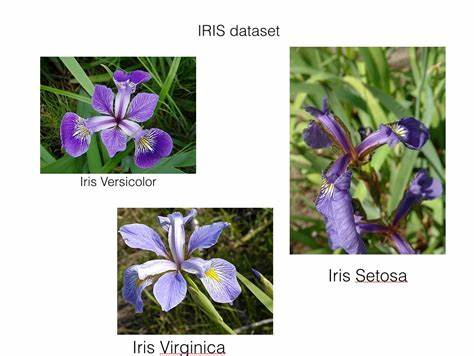

In [239]:
# 只读取的花瓣的宽度和长度属性
X = iris.data[:, [2, 3]]
y = iris.target

In [240]:
X.shape, y.shape

((150, 2), (150,))

# 切分数据集和预处理

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [243]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

使用Z-score方法对属性进行归一化处理

这里做Z-score是使用在训练集的均值和方差对测试集进行标准化，这里假设了测试集和训练集的数据分布相同。

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [246]:
scaler.mean_, scaler.scale_

(array([3.82857143, 1.22761905]), array([1.79595918, 0.77637684]))

In [247]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [248]:
X_train_norm.mean(axis=0), X_train_norm.std(axis=0)

(array([-3.59500789e-16,  7.82442894e-17]), array([1., 1.]))

In [249]:
X_test_norm.mean(axis=0), X_test_norm.std(axis=0)

(array([-0.13098187, -0.12144323]), array([0.92394678, 0.92084194]))

In [250]:
import numpy as np

In [251]:
X_all = np.vstack((X_train_norm, X_test_norm))
y_all = np.hstack((y_train, y_test))

# 模型训练和预测

In [252]:
from sklearn.metrics import accuracy_score

In [253]:
map_model_acc = {}

In [254]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=0.15,
                    linewidths=2,
                    marker='^',
                    edgecolors='black',
                    facecolors='none',
                    s=55, label='test set')

In [255]:
def plot_decision_regions_for_model(classifier, X=X_all, y=y_all, test_idx=range(105, 150), resolution=0.02):
    plot_decision_regions(X, y, classifier, test_idx, resolution)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

## 感知机

In [256]:
from sklearn.linear_model import Perceptron

In [257]:
ppn = Perceptron()
ppn.fit(X_train_norm, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [258]:
ppn.coef_ # w

array([[-0.93066067, -0.7372463 ],
       [ 1.63064476, -2.54049432],
       [ 2.90334311,  2.46075886]])

In [259]:
ppn.intercept_ # b

array([-1., -1., -4.])

In [260]:
y_pred = ppn.predict(X_test_norm)

In [261]:
map_model_acc['perceptron'] = accuracy_score(y_test, y_pred)
map_model_acc['perceptron']

0.8888888888888888

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


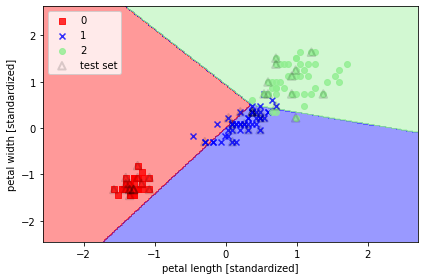

In [262]:
plot_decision_regions_for_model(ppn)

## 逻辑回归

In [263]:
from sklearn.linear_model import LogisticRegression

### 无正则化

In [335]:
# C表示正则化强度的导数，C越大表示正则化强度越小
log_reg_raw = LogisticRegression(C=100, random_state=0)
log_reg_raw.fit(X_train_norm, y_train)

/Users/yangqj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangqj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [336]:
y_pred = log_reg_raw.predict(X_test_norm)
map_model_acc['logistic_regression_raw'] = accuracy_score(y_test, y_pred)
map_model_acc['logistic_regression_raw']

0.9777777777777777

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


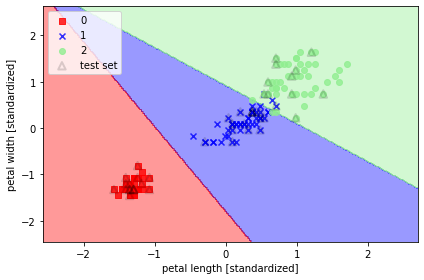

In [266]:
plot_decision_regions_for_model(log_reg_raw)

### l1正则化

In [329]:
log_reg_l1 = LogisticRegression(penalty='l1', C=1.0, random_state=0)
log_reg_l1.fit(X_train_norm, y_train)

/Users/yangqj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangqj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
y_pred = log_reg_l1.predict(X_test_norm)
map_model_acc['logistic_regression_l1'] = accuracy_score(y_test, y_pred)
map_model_acc['logistic_regression_l1']

0.9555555555555556

### l2正则化

In [339]:
log_reg_l2 = LogisticRegression(penalty='l2', C=3, random_state=0)
log_reg_l2.fit(X_train_norm, y_train)

/Users/yangqj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangqj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [340]:
y_pred = log_reg_l2.predict(X_test_norm)
map_model_acc['logistic_regression_l2'] = accuracy_score(y_test, y_pred)
map_model_acc['logistic_regression_l2']

0.9555555555555556

## svm

In [271]:
from sklearn.svm import SVC

In [272]:
# 使用线性核，假设数据集是线性可分的
svm_linear = SVC(kernel='linear', C=1.0, random_state=0)
svm_linear.fit(X_train_norm, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [273]:
y_pred = svm_linear.predict(X_test_norm)
map_model_acc['svm_linear'] = accuracy_score(y_test, y_pred)
map_model_acc['svm_linear']

0.9777777777777777

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


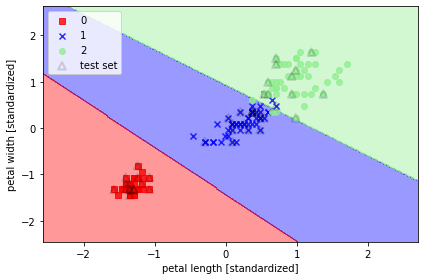

In [274]:
plot_decision_regions_for_model(svm_linear)

## 决策树

In [275]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
dt_id3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_id3.fit(X_train_norm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [277]:
y_pred = dt_id3.predict(X_test_norm)
map_model_acc['dt_id3'] = accuracy_score(y_test, y_pred)
map_model_acc['dt_id3']

0.9555555555555556

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


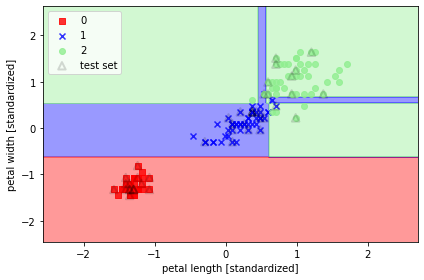

In [278]:
plot_decision_regions_for_model(dt_id3)

In [279]:
dt_id3.get_depth(), dt_id3.get_n_leaves()

(5, 8)

从上图的结果可以看到，树的深度过深，导致一些本来属于类别2的样本被划分为类别1。尝试采用前剪枝，设置最大树深度缓解过拟合从而提高准确度。

In [280]:
dt_id3_preprune = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_id3_preprune.fit(X_train_norm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [281]:
y_pred = dt_id3_preprune.predict(X_test_norm)
map_model_acc['dt_id3_preprune'] = accuracy_score(y_test, y_pred)
map_model_acc['dt_id3_preprune']

0.9777777777777777

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


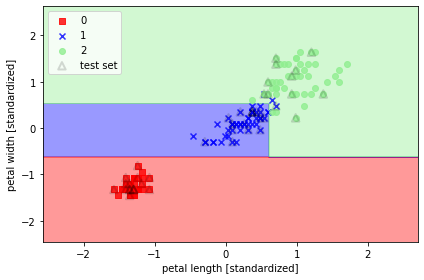

In [282]:
plot_decision_regions_for_model(dt_id3_preprune)

从结果可以看到，前剪枝起到了缓解过拟合的作用。

In [283]:
from sklearn.tree import export_graphviz

In [284]:
import graphviz

In [285]:
dot_data = export_graphviz(dt_id3_preprune, out_file=None, 
                           feature_names=['petal length', 'petal width'],
                          class_names=['setosa', 'versicolor', 'virginica'],
                          filled=True,
                          rounded=True)

In [286]:
dt_id3_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_id3_gini.fit(X_train_norm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [287]:
y_pred = dt_id3_gini.predict(X_test_norm)
map_model_acc['dt_id3_gini'] = accuracy_score(y_test, y_pred)
map_model_acc['dt_id3_gini']

0.9777777777777777

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


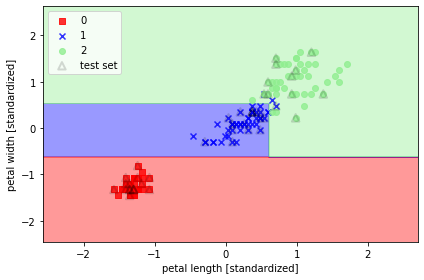

In [288]:
plot_decision_regions_for_model(dt_id3_gini)

## 随机森林集成

In [289]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
rf = RandomForestClassifier(criterion='gini', n_estimators=10, max_depth=3, random_state=0)
rf.fit(X_train_norm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [291]:
y_pred = rf.predict(X_test_norm)
map_model_acc['rf'] = accuracy_score(y_test, y_pred)
map_model_acc['rf']

0.9777777777777777

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


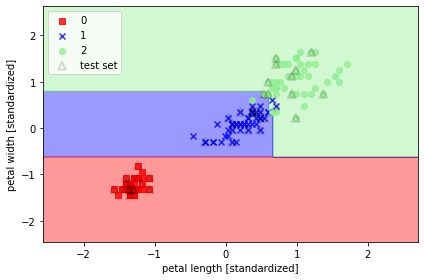

In [292]:
plot_decision_regions_for_model(rf)

## KNN

In [293]:
from sklearn.neighbors import KNeighborsClassifier

In [294]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [295]:
y_pred = knn.predict(X_test_norm)
map_model_acc['knn'] = accuracy_score(y_test, y_pred)
map_model_acc['knn']

1.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


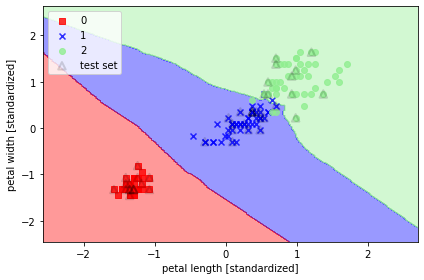

In [296]:
plot_decision_regions_for_model(knn)

# 汇总

In [297]:
import pandas as pd

In [341]:
map_model_acc

{'perceptron': 0.8888888888888888,
 'logistic_regression_raw': 0.9777777777777777,
 'logistic_regression_l1': 0.9555555555555556,
 'logistic_regression_l2': 0.9555555555555556,
 'svm_linear': 0.9777777777777777,
 'dt_id3': 0.9555555555555556,
 'dt_id3_preprune': 0.9777777777777777,
 'dt_id3_gini': 0.9777777777777777,
 'rf': 0.9777777777777777,
 'knn': 1.0}

In [342]:
df = pd.DataFrame.from_dict(map_model_acc, orient='index', columns=['accuracy'])
df

,accuracy
perceptron,0.888889
logistic_regression_raw,0.977778
logistic_regression_l1,0.955556
logistic_regression_l2,0.955556
svm_linear,0.977778
dt_id3,0.955556
dt_id3_preprune,0.977778
dt_id3_gini,0.977778
rf,0.977778
knn,1.000000


In [343]:
df.sort_values(by=['accuracy'], ascending=False)

,accuracy
knn,1.000000
logistic_regression_raw,0.977778
svm_linear,0.977778
dt_id3_preprune,0.977778
dt_id3_gini,0.977778
rf,0.977778
logistic_regression_l1,0.955556
logistic_regression_l2,0.955556
dt_id3,0.955556
perceptron,0.888889


从上面的结果可以看到：
+ 对于逻辑回归，使用未正则化的模型反而在三种模型中得到了最好的结果
+ KNN模型取得了最好的结果